In [11]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

In [12]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com a prova!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv, tudo certo para prosseguir com a prova!


In [13]:
dados = pd.read_csv('pokemon.csv')
dados

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [14]:
list(dados)

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'japanese_name',
 'name',
 'percentage_male',
 'pokedex_number',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary']

In [5]:
tipos1 = dados['type1']
l = tipos1.value_counts()

tipos_pokemon=list(l.index) #todos os tipos

l

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [45]:
colunas_numericas = ['type1','attack','base_total','defense','sp_attack','height_m']
dados_numericos=dados.loc[:,colunas_numericas]
filtra_grass = dados_numericos['type1']=='grass'
filtra_bug = dados_numericos['type1']=='bug'
filtra_dark = dados_numericos['type1']=='dark'
filtra_dragon = dados_numericos['type1']=='dragon'
filtra_electric = dados_numericos['type1']=='electric'
filtra_fairy = dados_numericos['type1']=='fairy'
filtra_fighting = dados_numericos['type1']=='fighting'
filtra_fire = dados_numericos['type1']=='fire'
filtra_flying = dados_numericos['type1']=='flying'
filtra_ghost = dados_numericos['type1']=='ghost'
filtra_grass = dados_numericos['type1']=='grass'
filtra_ground = dados_numericos['type1']=='ground'
filtra_ice = dados_numericos['type1']=='ice'
filtra_normal = dados_numericos['type1']=='normal'
filtra_rock = dados_numericos['type1']=='rock'
filtra_poison = dados_numericos['type1']=='poison'
filtra_psychic = dados_numericos['type1']=='psychic'
filtra_steel = dados_numericos['type1']=='steel'
filtra_water = dados_numericos['type1']=='water'
dados_numericos=dados_numericos.loc[filtra_grass|filtra_water,:]
dados_numericos

,type1,attack,base_total,defense,sp_attack,height_m
0,grass,49,318,49,65,0.7
1,grass,62,405,63,80,1.0
2,grass,100,625,123,122,2.0
6,water,48,314,65,50,0.5
7,water,63,405,80,65,1.0
...,...,...,...,...,...,...
770,water,60,410,130,30,0.3
778,water,105,475,70,70,0.9
786,grass,130,570,115,85,1.9
787,water,75,570,115,95,1.3


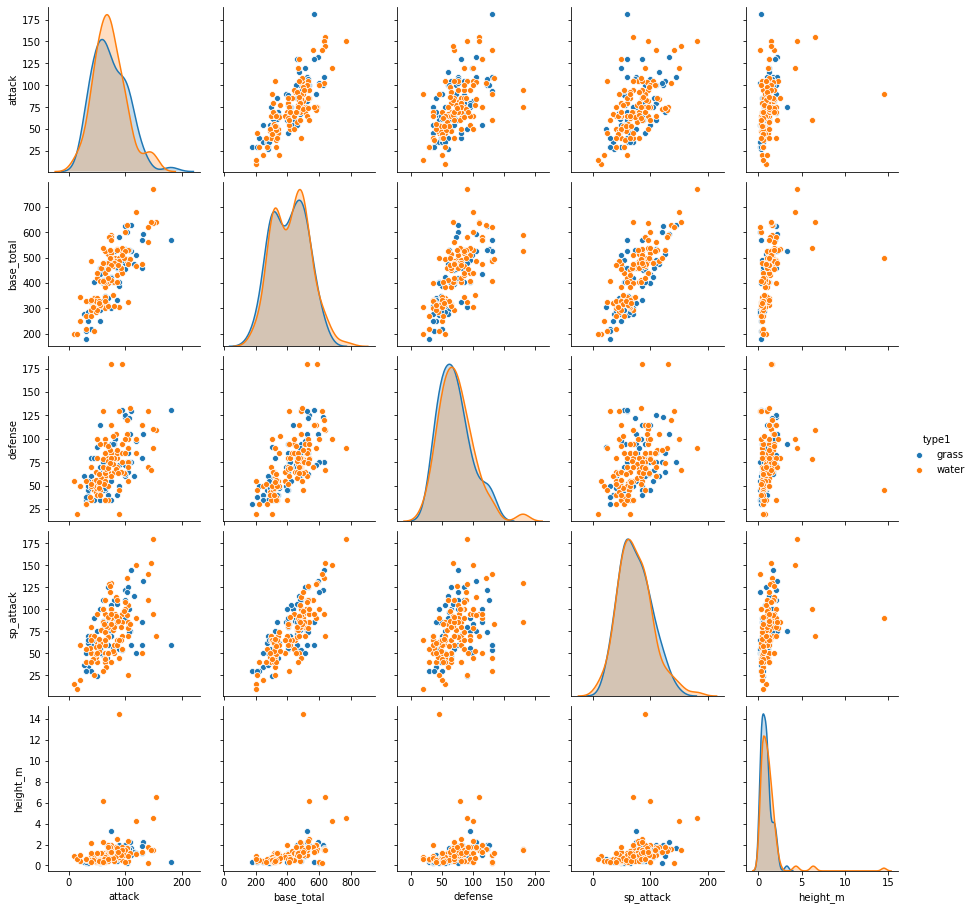

In [46]:
sns.pairplot(dados_numericos,hue='type1')

In [10]:
dados_train, dados_test = train_test_split(dados,test_size=0.40, random_state=42)